# 1. Exact Solutions of ODEs using Sympy

### 1.0 General guidance for solving differential Equations using Sympy - Solve the equation : 
\\( xf''(x) + f'(x) = x^3 \\)
### with initial conditions 
\\( f(1) = 0 \:  and \: f'(2) = 1 \\)

In [110]:
import sympy as sp
x = sp.Symbol('x')
x

x

In [111]:
f = sp.Function('f')(x)
f.diff(x)

Derivative(f(x), x)

In [112]:
diff_eq = sp.Eq(x*f.diff(x,x) + f.diff(x), x**3)
diff_eq

Eq(x*Derivative(f(x), (x, 2)) + Derivative(f(x), x), x**3)

In [113]:
soln = sp.dsolve(diff_eq, f)
soln

Eq(f(x), C1 + C2*log(x) + x**4/16)

In [114]:
#initial conditions specified as a dictionary
ics = {f.subs(x,1):0,f.diff(x).subs(x,2):1}

In [115]:
soln = sp.dsolve(diff_eq,f,ics=ics)
soln

Eq(f(x), x**4/16 - 2*log(x) - 1/16)

### Sympy classifies the ODE as one of the several methods described at https://docs.sympy.org/latest/modules/solvers/ode.html

In [117]:
sp.classify_ode(diff_eq)

('factorable',
 'nth_linear_euler_eq_nonhomogeneous_undetermined_coefficients',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters',
 'nth_order_reducible',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters_Integral')

### Sympy can be used to check whether the solution found to an ODE is correct or not

In [119]:
sp.checkodesol(diff_eq,soln)

(True, 0)

### To determine the family of solutions and see them graphically, for a differential equation : 
### $y=x y^{\prime}-y^{\prime2}$

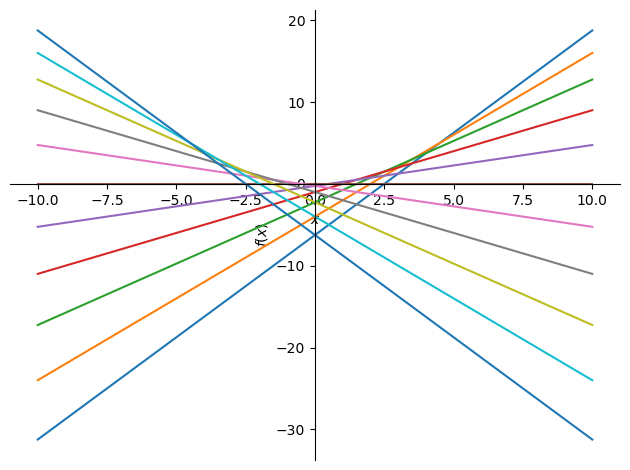

In [121]:
from sympy import symbols, Function, Eq, dsolve, plot

x = symbols('x')
y = Function('y')(x)

diff_eqn = Eq(y, x*y.diff(x) - y.diff(x)**2)
#diff_eqn
sol = dsolve(diff_eqn, y)
#sol
plot1 = plot(show=False)
for c1 in range(-5, 6):
    plotc1 = plot(sol.subs('C1', c1).rhs, show=False)
    plot1.append(plotc1[0])
plot1.show()

### 1.1 Problem: Find the solution of the Separable Differential Equation
### $(4x+x y^{2})\,d x+(y+x^{2}y)\,d y\ =\ 0.$

In [123]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq((4*x + x*y**2) + (y + x**2*y)*y.diff(x),0)
#diff_eqn
sp.dsolve(diff_eqn, y, hint='separable')[0] ## The hint not necessary here

Eq(y(x), sqrt((C1 - 4*x**2)/(x**2 + 1)))

### 1.2 Problem : Solve the exact ODE 
### $\left(3 x^2+y \cos x\right) d x+\left(\sin x-4 y^3\right) d y=0$
#####  <font color='orange'>Please note some idiosyncracies of Sympy, here we have to give a hint and the problem has to stated in a manner where dx and dy are not separate, but together as dy/dx</font>

In [125]:
y = sp.Function('y')(x)
y.diff(x)

Derivative(y(x), x)

In [126]:
sol = sp.dsolve((3*x**2+y*sp.cos(x))+(sp.sin(x)-4*y**3)*y.diff(x), hint='1st_exact_Integral')
sol

Eq(Subs(Integral(_y*cos(x) + 3*x**2, x) + Integral(-4*_y**3 + sin(x) - Integral(cos(x), x), _y), _y, y(x)), C1)

### 1.3.1 Using Integrating Factors , solve the inexact ODE :
### $\left(3 x y^2+2 y\right) d x+\left(2 x^2 y+x\right) d y=0$

In [128]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq((3*x*y**2 + 2*y) + (2*x**2*y + x)*y.diff(x),0)
#diff_eqn
sp.dsolve(diff_eqn, y)[0]

Eq(y(x), (-sqrt(C1/x + 1) - 1)/(2*x))

This is correct - on simplifying and manipulating we get the correct answer : $x^2 y+x^3 y^2=c$

### 1.3.2 Problem : Solve the inexact differential equation using Integrating Factors :
### $\left(y+x^4\right) d x-x d y=0$

In [131]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq((y + x**4) - (x)*y.diff(x),0)
#diff_eqn
sp.dsolve(diff_eqn, y)

Eq(y(x), x*(C1 + x**3/3))

### 1.4 Solve the Linear Equation : $x \frac{d y}{d x}-2 y=x^3 \cos 4 x$
### These Equations are of the form : $\frac{d y}{d x}+P(x) y=Q(x)$

In [133]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq(x*y.diff(x) - 2*y,x**3*sp.cos(4*x))
#diff_eqn
sp.dsolve(diff_eqn, y)

Eq(y(x), x**2*(C1 + sin(4*x)/4))

### Solve the Homogenous Equation : $\left(2 x^3+y^3\right) d x-3 x y^2 d y=0$
### These Equations are solved by using y=vx as a substitution
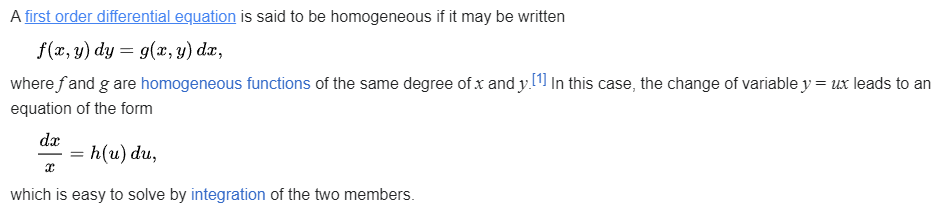
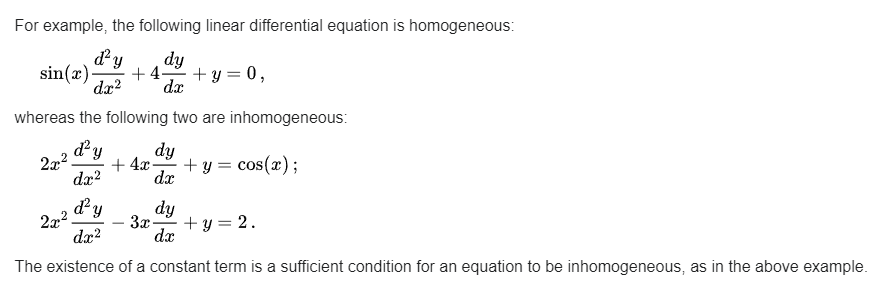

In [135]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq((2*x**3+y**3) - (3*x*y**2)*y.diff(x),0)
#diff_eqn
sp.dsolve(diff_eqn, y)[0] # To display only the first solution

Eq(y(x), (x*(C1 + x**2))**(1/3))

### 1.5 Solve the Equation $x\frac{d y}{d x}+y\;=\;x y^{3}.$
### Such equations are called Bernoulli's Equation and are of the form $\frac{d y}{d x}+P(x)y\ =\ Q(x)y^{n},\ \ n\neq0,1$

In [137]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq(x*y.diff(x) + y, x*y**3)
#diff_eqn
sp.dsolve(diff_eqn, y)[0] # To display only the first solution

Eq(y(x), -sqrt(1/(x*(C1*x + 2))))

### $\mathrm{Solve}\quad y\;=\;p x\pm\sqrt{p^{2}+1}\quad\mathrm{where}\quad p=y^{\prime}$
### <font color='red'>Sympy Cannot Solve</font>
### <font color='green'>However this can be solved using MATLAB with the following code</font>
### <font color='green'>You can try MATLAB for free at https://in.mathworks.com/products/matlab-online.html for a limited period of time</font>
<h5 align="center">syms y(x)</h5>
<h5 align="center">eqn = y == diff(y)*x + (diff(y)^2+1)^(1/2)</h5>
<h5 align="center">S = dsolve(eqn, 'Implicit',true)</h5>

In [140]:
y = sp.Function('y')(x)
y.diff(x)
#p = sp.symbols(p) # set y' = p
diff_eqn = sp.Eq(y,x*y.diff(x) + sp.sqrt(y.diff(x)**2 + 1))
diff_eqn
#sol = sp.dsolve(diff_eqn, y, hint='nth_order_reducible') 
#sol

Eq(y(x), x*Derivative(y(x), x) + sqrt(Derivative(y(x), x)**2 + 1))

### Solving Higher order Equations
### $y^{\prime\prime}+2y^{\prime}\,=\,4x$

In [143]:
y = sp.Function('y')(x)
y.diff(x)
diff_eqn = sp.Eq(y.diff(x,x) + 2*y.diff(x), 4*x)
#diff_eqn
#sp.dsolve(diff_eqn, y)#, hint='NthOrderReducible') 

### Solve : $1+y y^{\prime\prime}+y^{\prime2}\;=\;0.$
### <font color='red'>Sympy Cannot Solve</font>
### <font color='green'>However this can be solved using MATLAB with the following code</font>
### <font color='green'>You can try MATLAB for free at https://in.mathworks.com/products/matlab-online.html for a limited period of time</font>
<h5 align="center">syms y(x)</h5>
<h5 align="center">eqn = 1 + y*diff(y,2) + diff(y)^2 == 0</h5>
<h5 align="center">S = dsolve(eqn, 'Implicit',true)</h5>

In [145]:
#p = sp.Symbol('p')
y = sp.Function('y')(x)
#p = sp.Function('p')
#p = sp.diff(y,x)
diff_eqn = sp.Eq(1+y*sp.diff(y,x,x)+sp.diff(y,x)**2,0)
diff_eqn
#Since x is not there in the equation we substitute y' = p
#sp.dsolve(diff_eqn, y, implicit='true')#.subs(p,y.diff(x)).simplify()

Eq(y(x)*Derivative(y(x), (x, 2)) + Derivative(y(x), x)**2 + 1, 0)

# 2.Numerical Solutions of ODEs

### Euler's method -  Solve the differential equation numerically
### $d y/d x=2x+y,\;y(0)=1$  
### (a) find the approximate value of y(.5) using the step by step or Euler's method  with h = .1 and
### (b)  compare with the exact solution.

In [148]:
# Exact Solution
x = sp.Symbol('x')
y = sp.Function('y')(x)
diff_eqn = sp.Eq(y.diff(x), 2*x + y)
diff_eqn
sol = sp.dsolve(diff_eqn, y, ics={y.subs(x,0):1})
sol
sp.pprint(sol.rhs.subs(x,0.5).evalf())

1.94616381210038


In [163]:
# Basic idea of Euler's method:
# y'(x) = y(x + h) - y(x) / h => h*y'(x) = y(x+h) - y(x) => y(x + h) = y(x) + y(x + h)
# IT follows, if we move step by step :
# y(x1) = x0 + h*y'(x0) - x1 = x0 + h
# y(x2) = x1 + h*y'(x1) - x2 = x1 + h
# We need to start with a initial value, which in this case is y(0) = 1
# Step size h = 0.1
h = 0.1
x = 0 # because initial condition is x = 0
y = 1 # initial condition
x = x + h
for i in range(5):
        y = y + h*(2*x + y)
        print('The new value of y,x are :',y,x)
        x = x + h

The new value of y,x are : 1.12 0.1
The new value of y,x are : 1.2720000000000002 0.2
The new value of y,x are : 1.4592000000000003 0.30000000000000004
The new value of y,x are : 1.6851200000000004 0.4
The new value of y,x are : 1.9536320000000005 0.5


### Solve the same equation by Taylor Series Method

In [151]:
# Exact Solution
x = sp.Symbol('x')
y = sp.Function('y')(x)
diff_eqn = sp.Eq(y.diff(x), 2*x + y)
diff_eqn
sol = sp.dsolve(diff_eqn, y, ics={y.subs(x,0):1})
#sol
Taylor_exp = sp.series(sol.rhs).removeO()
#Taylor_exp
Taylor_exp.subs(x,0.5).evalf()

1.94609375000000

### Solve the same by Runge Kutta Method :
### This method consists of computing : $\begin{array}{r l}{k_{1}}&{=}&{{}h f(x_{0},y_{0})}\\ {k_{2}}&{=}&{{}h f(x_{0}+{\frac{1}{2}}h,\,y_{0}+{\frac{1}{2}}k_{1})}\\ {k_{3}}&{=}&{{}h f(x_{0}+{\frac{1}{2}}h,\,y_{0}+{\frac{1}{2}}k_{2})}\\ {k_{4}}&{=}&{{}h f(x_{0}+h,\,y_{0}+k_{3})}\end{array}$
### Then $y(x_{0}+h)\ \ =\ \ y_{0}\ +\ \textstyle{\frac{1}{6}}(k_{1}+2k_{2}+{2} k_{3}+k_{4})$

In [153]:
# As per the book this gives the correct answer

h = 0.5
x = 0 # because initial condition is x = 0
y = 1 # initial condition
k1 = h*(2*x + y)
k2 = h*(2*(x+(0.5*h)) + (y+0.5*k1))
k3 = h*(2*(x+(0.5*h)) + (y+0.5*k2))
k4 = h*(2*(x+h) + (y + k3))
y = y + (k1 + 2*k2 + 2*k3 + k4)/6
print('The new value of y,x,k1,k2,k3,k4 are :',y,x,k1,k2,k3,k4)

The new value of y,x,k1,k2,k3,k4 are : 1.9453125 0 0.5 0.875 0.96875 1.484375


In [165]:
# However if I do an iterative method with h = 0.1 I get a different answer

h = 0.5/5
x = 0 # because initial condition is x = 0
y = 1 # initial condition
x = x + h
for i in range(5):
        k1 = h*(2*x + y)
        k2 = h*(2*(x+(0.5*h)) + (y+0.5*k1))
        k3 = h*(2*(x+(0.5*h)) + (y+0.5*k2))
        k4 = h*(2*(x+h) + (y + k3))
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        print('The new value of y,x,k1,k2,k3,k4 are :',y,x,k1,k2,k3,k4)
        x = x + h

The new value of y,x,k1,k2,k3,k4 are : 1.1365466666666666 0.1 0.12 0.136 0.1368 0.15368
The new value of y,x,k1,k2,k3,k4 are : 1.3084882267222222 0.2 0.1536546666666667 0.1713374 0.17222153666666667 0.19087682033333334
The new value of y,x,k1,k2,k3,k4 are : 1.5195471906001206 0.30000000000000004 0.19084882267222225 0.21039126380583337 0.2113683858625139 0.23198566125847364
The new value of y,x,k1,k2,k3,k4 are : 1.7738375682581942 0.4 0.23195471906001208 0.25355245501301266 0.2546323418106627 0.2774179532410783
The new value of y,x,k1,k2,k3,k4 are : 2.075906043509882 0.5 0.27738375682581945 0.3012529446671104 0.302446404059175 0.3276283972317369
